# Understanding correlation 


One of the main questions I faced while exploring data was that how can I measure the strength of the relationship between two features of the data. 

For example, how is the price of a car related with its mileage? How do we quantify their interdependence? How strong is the relationship? 

I attempt to explore this mathematically in this notebook.

In [47]:
# Importing the required libraries
import pandas as pd
import seaborn as sns

### We shall consider a dataset that gives the specifications of cars and their prices.
Dataset link: https://archive.ics.uci.edu/ml/datasets/automobile

In [48]:
df = pd.read_csv("Automobile_data.csv")

# We shall consider three variables: the logarithm of the price, city mileage, curb weight.
test_df = pd.read_csv('corr_data.csv')

## The Pearson Correlation Coefficient

To measure the linear correlation between variables, correlation coefficients are defined. One such coefficient that pandas uses by default is the Pearson correlation coefficient.

Suppose we have two features (columns in the data) of the data: X and Y. Each feature contains N data points. Pearson correlation $r_{XY}$ is defined as:

$$r_{XY} = \frac{\sum_{i=1}^N(X_i - \overline{X})(Y_i - \overline{Y})}{\sqrt{\sum_{i=1}^N(X_i - \overline{X})^2}\sqrt{\sum_{i=1}^N(Y_i - \overline{Y})^2}}$$

Here, $\overline{X}$ represents the mean of all the values of $X$. 

A value of 1 represents positive linear dependence i.e. $Y_{i} = mX_{i} + C$ where $m > 0$. 

A value of -1 represents negative linear dependence i.e. $Y_{i} = mX_{i} + C$ where $m < 0$

As we rarely find data that has exact linear dependence, the values of $r_{XY}$ practically lie between 1 and -1. Values closer to 0 represent little or no linear correlation between the two variables.


Let us investigate the different components of the above mathematical expression.

1. $(X_{i} - \overline{X})$ 

This expresses the distance of the $i^{th}$ from $\overline{X}$. If $X_{i}$ is greater than the mean X value, its value will be positive and vice versa.

2. Similarly, $(Y_{i} - \overline{Y})$ is calculated. 
 
 
3. $\sqrt{\sum_{i=1}^N(X_i - \overline{X})^2}$ and $\sqrt{\sum_{i=1}^N(Y_i - \overline{Y})^2}$ 

The value of the numerator in the expression or $r_{XY}$ will depend upon the actual values of X and Y. Assume that we are dealing with values of $X$ and $Y$ that are quite high. We will correspondingly obtain high values of $X_{i} - \overline{X}$ and $Y_{i} - \overline{Y}$. Hence the value of the coefficient will not be constrained between 1 and -1. 

The above expressions normalize the coefficient.

Let us head over to a practical example.


We'll consider three features of the data: `log_price`: which is the logarithm of the price of the car; `city-mpg`: the city mileage of cars; `curb-weight`: the total mass of the vehicle without any passengers or cargo

In [49]:
test_df = test_df.drop(['Unnamed: 0'], axis=1)
test_df.head()

,log_price,city-mpg,curb-weight
0,9.510075,21.0,2548
1,9.711116,21.0,2548
2,9.711116,19.0,2823
3,9.543235,24.0,2337
4,9.767095,18.0,2824


The correlation coefficients between each of the 3 features can be obtained from the corr() function offered by pandas

In [51]:
test_df.corr()

,log_price,city-mpg,curb-weight
log_price,1.000000,-0.774933,0.891455
city-mpg,-0.774933,1.000000,-0.749543
curb-weight,0.891455,-0.749543,1.000000


I will try and give you a mathematical intuition of what is actually happening behind the scenes.

In [52]:
# Calculating the mean values of each column

avgs = test_df.mean()
avgs

log_price         9.350115
city-mpg         25.179104
curb-weight    2555.666667
dtype: float64

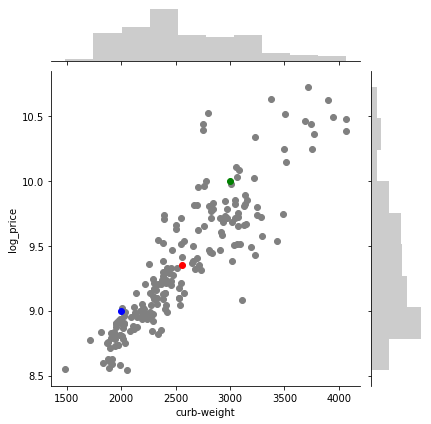

In [53]:
plot1 = sns.jointplot(x="curb-weight", y="log_price", data=test_df, color='gray')
plot1.ax_joint.scatter(avgs["curb-weight"], avgs["log_price"], color='red')
plot1.ax_joint.scatter(3000, 10, color='green')
plot1.ax_joint.scatter(2000, 9, color='blue')

## Consider the relationship between the variables log_price and curb_weight

Looking at the graph above, we find that the two variables have a strong positive linear interdependence. Higher the curb weight, higher is the price. This is also apparent from the correlation matrix above as the Pearson coefficient has a value of 0.891455.

The red point represents $(\overline{X}, \overline{Y})$. 

Consider the two points shown in green and blue lying on opposite sides of the red point.

Let the green point be the $m^{th}$ point. Looking at its position, we can infer that $X_{m} - \overline{X} > 0$ and $Y_{m} - \overline{Y} > 0$. 

Hence, $(X_{m} - \overline{X})(Y_{m} - \overline{Y}) > 0$

Let the blue point be the $k^{th}$ point. From its position, we can say that $X_{m} - \overline{X} < 0$ and $Y_{m} - \overline{Y} < 0$. 

Hence, $(X_{k} - \overline{X})(Y_{k} - \overline{Y}) > 0$

Thus, for points lying to the top-right and bottom-left of $(\overline{X}, \overline{Y})$ will give positive values of the above product. The numerator of $r_{XY}$ is the sum of all such products. Hence for these two features, a net positive sum will be obtained, which will be normalized to values between 0 and 1.

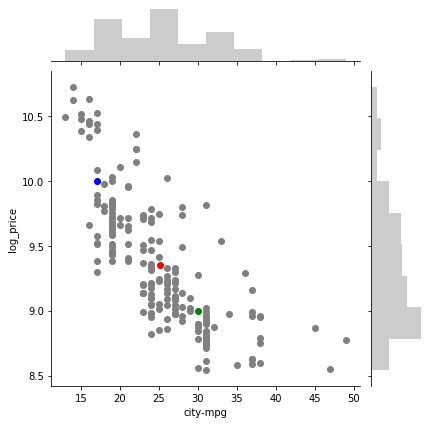

In [54]:
plot1 = sns.jointplot(x="city-mpg", y="log_price", data=test_df, color='gray')
plot1.ax_joint.scatter(avgs["city-mpg"], avgs["log_price"], color='red')
plot1.ax_joint.scatter(17, 10, color='blue')
plot1.ax_joint.scatter(30, 9, color='green')

## A similar analysis can be done for city-mpg and log_price in the graph above
For the green($m^{th}$) point, $X_{m} - \overline{X} > 0$ and $Y_{m} - \overline{Y} < 0$. 

Hence, $(X_{k} - \overline{X})(Y_{k} - \overline{Y}) < 0$

For the blue($k^{th}$) point, $X_{m} - \overline{X} < 0$ and $Y_{m} - \overline{Y} > 0$. 

Hence, $(X_{k} - \overline{X})(Y_{k} - \overline{Y}) < 0$

For all point lying to the top-left and bottom-right will have negative values of the above product. The net sum of these values will ultimately be negative. The value of $r_{XY}$ will lie between -1 and 0

## Final thoughts

Using some simple mathematical techniques, we have simply divided the graph into four parts: top-left of the mean point, top-right of the mean point, bottom-left of the mean point and bottom-right of the mean point. We find the pair of quadrants in which majority of data points live and then infer the nature of the interdependence of the two variables under consideration. 

The correlation matrix can be visualized using heatmaps in seaborn.

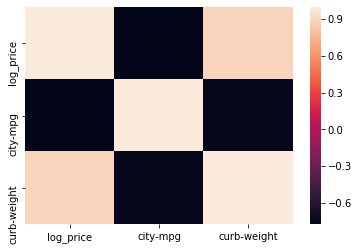

In [55]:
sns.heatmap(test_df.corr())

For a larger number of features, the correlation can be easily understood with a heatmap.

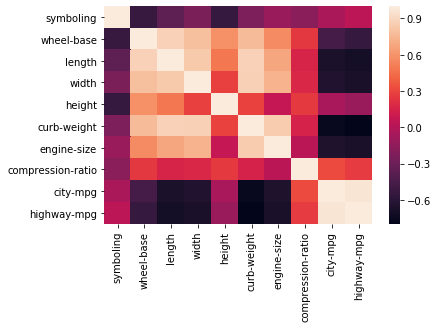

In [56]:
sns.heatmap(df.corr())